In [1]:
import os
from glob import glob
import numpy as np
import tqdm
from PIL import Image
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras import layers
from tensorflow.keras import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
data = np.load("/content/drive/My Drive/gmmpg/zucchini.npz")
X_train, y_train, X_test, y_test = [data[f] for f in data.files]

In [4]:
# 픽셀 값 조정

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
# one-hot encoding

y_train = utils.to_categorical(y_train, 4)
y_test = utils.to_categorical(y_test, 4)

In [6]:
num_epochs = 100
batch_size = 200

learning_rate = 0.00014023399602325874

input_shape = (256, 256, 3)
num_classes = 4

In [7]:
model = keras.Sequential([
    Conv2D(64, kernel_size = (3, 3), padding = 'same', input_shape = input_shape, activation = tf.nn.relu),
    MaxPooling2D(pool_size = (2, 2)),
    Dropout(0.05),
    
    Conv2D(32, kernel_size = (3, 3), padding = 'same', activation = tf.nn.relu),
    MaxPooling2D(pool_size = (2, 2)),
    Dropout(0.35000000000000003),
    
    Flatten(),
    Dense(352, activation = tf.nn.relu),
    Dropout(0.15000000000000002),
    Dense(num_classes, activation = tf.nn.softmax)
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0

In [9]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate),
    metrics = ['accuracy']
)

In [10]:
model_name = 'best_model.h5'

modelCheckpoint = tf.keras.callbacks.ModelCheckpoint(model_name, save_best_only=True)

In [11]:
history = model.fit(
    X_train, 
    y_train,
    batch_size = 200,
    epochs = num_epochs,
    validation_split = 0.2,
    shuffle = True,
    callbacks=[modelCheckpoint]
)

Epoch 1/100
54/54 [==============================] - 17s 315ms/step - loss: 1.9027 - accuracy: 0.3061 - val_loss: 1.3239 - val_accuracy: 0.3880
Epoch 2/100
54/54 [==============================] - 16s 295ms/step - loss: 1.2615 - accuracy: 0.4592 - val_loss: 1.1923 - val_accuracy: 0.4937
Epoch 3/100
54/54 [==============================] - 16s 294ms/step - loss: 1.1553 - accuracy: 0.5072 - val_loss: 1.1292 - val_accuracy: 0.5101
Epoch 4/100
54/54 [==============================] - 16s 294ms/step - loss: 1.0544 - accuracy: 0.5643 - val_loss: 1.0237 - val_accuracy: 0.5721
Epoch 5/100
54/54 [==============================] - 16s 297ms/step - loss: 0.9679 - accuracy: 0.6105 - val_loss: 0.9457 - val_accuracy: 0.6191
Epoch 6/100
54/54 [==============================] - 16s 290ms/step - loss: 0.8760 - accuracy: 0.6596 - val_loss: 0.8769 - val_accuracy: 0.6550
Epoch 7/100
54/54 [==============================] - 16s 297ms/step - loss: 0.7919 - accuracy: 0.6997 - val_loss: 0.7957 - val_accuracy:

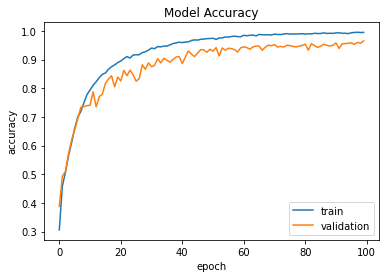

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

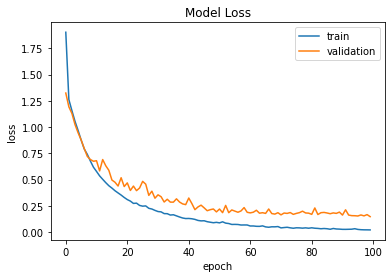

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [14]:
y_pred = model.predict(X_test)

cor = 0
for i in range(len(y_pred)):
    if np.argmax(y_pred[i]) - np.argmax(y_test[i]) == 0:
        cor += 1
print('score :',cor / len(y_pred) * 100)

score : 95.93665969524949


In [15]:
from keras.models import load_model

model.save(model_name)